# ΤΕΛΙΚΗ ΕΡΓΑΣΙΑ ΣΤΑΡΥΙΝΙΔΗΣ - ΧΑΝΙΑΣ

Σε αυτό το κομμάτι της εργασίας εκτελούμε ποιοτική ανάλυση της χαοτικής χρονοσειράς. Συγκεκριμένα:
- Υπολογίζουμε φάσμα ισχύος, που εξ'ορισμού είναι $P_{av} = \sum_{k=0}^{N-1}|X'(\omega)|^2 \Leftrightarrow  P(\omega) = |X'(\omega)|^2$, οπου $P$ το φάσμα ισχύος ως προς τις κυκλικές συχνότητες $\omega$, και $X'(\omega)$ ο μετασχηματισμός Fourier της αρχικής χρονοσειράς $X(t)$
- Ανακατασκευάζουμε τον χώρο φάσεων
- Παράγουμε από το χώρο φάσεων ένα φασικό διάγραμμα (πορτραίτο) και εναποθέτουμε τον ελκυστή στο χώρο φάσεων

## IMPORTS AND DEFINITIONS

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate

In [2]:
def mackey_glass(x0=0.1, tau=22, b=0.2, g=0.1, n=10, lim= 800, steps=5000):
    '''Function to produce Mackey-Glass Time Series, with initial condition t0=0, x0=0.1'''
    x = np.empty(steps)
    x[0] = x0
    k = b*x0/(1+x0**n)
    # h = lim/steps
    for i in range(1, steps):
        if i<=tau:
            k1 = k - g*x[i-1]
            k2 = k - g*(x[i-1]+k1/2)
            k3 = k - g*(x[i-1]+k2/2)
            k4 = k - g*(x[i-1]+k3)
            x[i] = x[i-1] + 1/6*(k1+2*k2+2*k3+k4)
            # x[i] = k + x[i-1]*(1-g)
        else:
            # X = np.array(range(i-1))
            # X_new = np.linspace(0, i-1, 2*(i-1)-1)
            # f = interpolate.CubicSpline(X, x[:i-1], bc_type= 'natural')
            # fit = f(X_new)
            xt = (x[i-tau-1] + x[i-tau])/2
            k1 = b*x[i-tau-1]/(1+x[i-tau-1]**n) - g*x[i-1]
            k2 = b*xt/(1+xt**n) - g*(x[i-1]+k1/2)
            k3 = b*xt/(1+xt**n) - g*(x[i-1]+k2/2)
            k4 = b*x[i-tau]/(1+x[i-tau]**n) - g*(x[i-1]+k3)
            x[i] = x[i-1] + 1/6*(k1+2*k2+2*k3+k4)
            # x[i] = b*x[i-tau-1]/(1+x[i-tau-1]**n) + x[i-1]*(1-g)
    return x

def check_imag(x):
    '''Function that returns TRUE if at least one value in x has a non-zero imaginary part.
    Else returns FALSE'''

    FLAG = FALSE
    for i in x:
        if i.imag != 0:
            FLAG = TRUE
            break
    
    return FLAG

## DATA PREPARATION AND CALCULATIONS
Η συνάρτηση _np.fft.fft()_ υπολογίζει το μετασχηματισμό Fourier του πίνακα που δίνεται  ως $X$

In [9]:
# Q = Q*25000
# filetype = '.jpg'
# path = './Images/'
t = 22
b = 0.2
g = 0.1
x0 = 0.1
n = 10
# Q = mackey_glass(tau= t)
data = pd.read_csv('x0={}_tau={}_b0={}_g={}_n={}.csv'.format(x0,t,b,g,n), header=None)
# data1 = pd.read_csv('mg1.dat', header=None)
Q = data.to_numpy()
Q = Q.T[0]

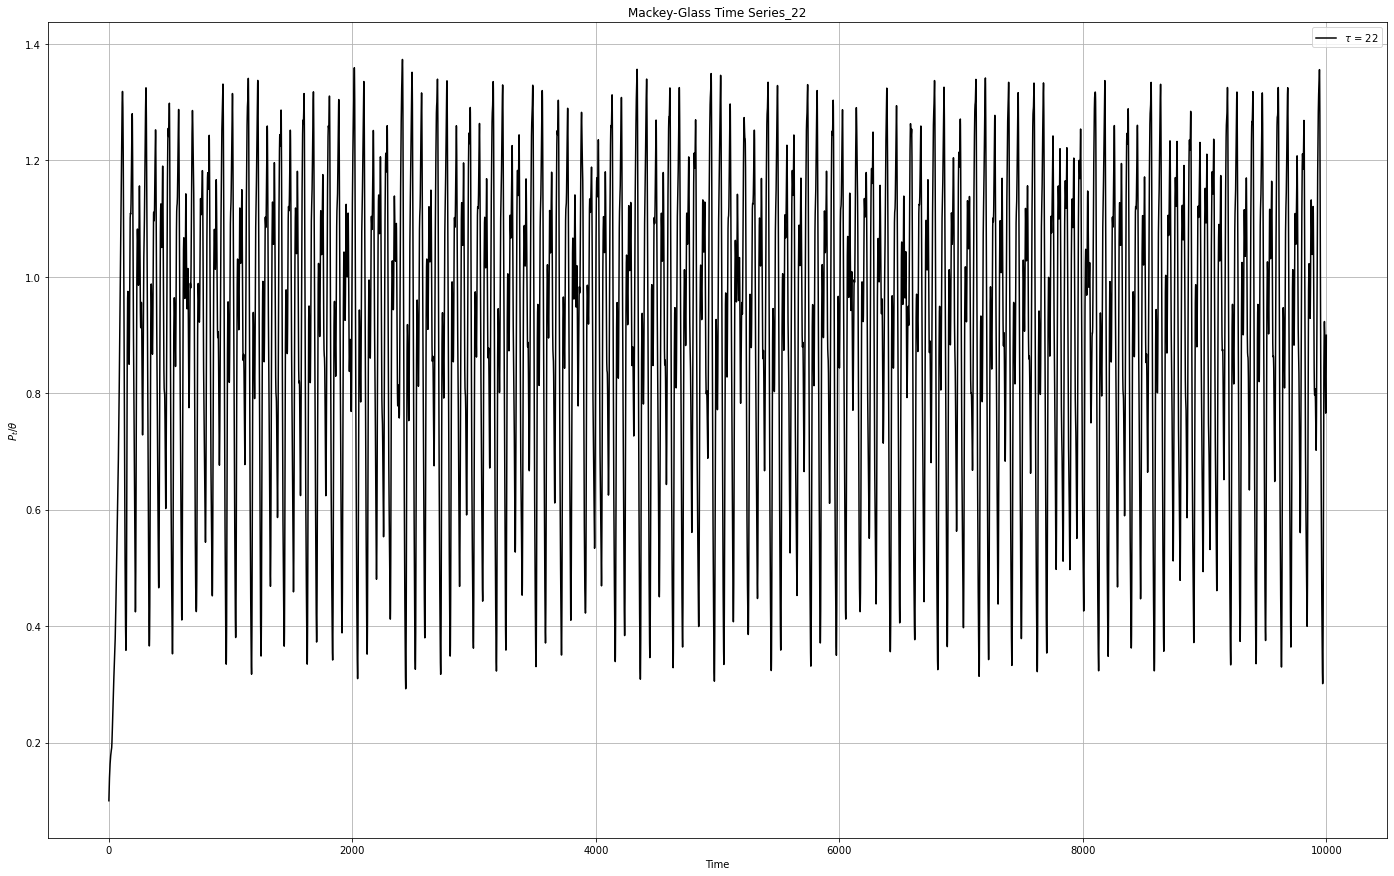

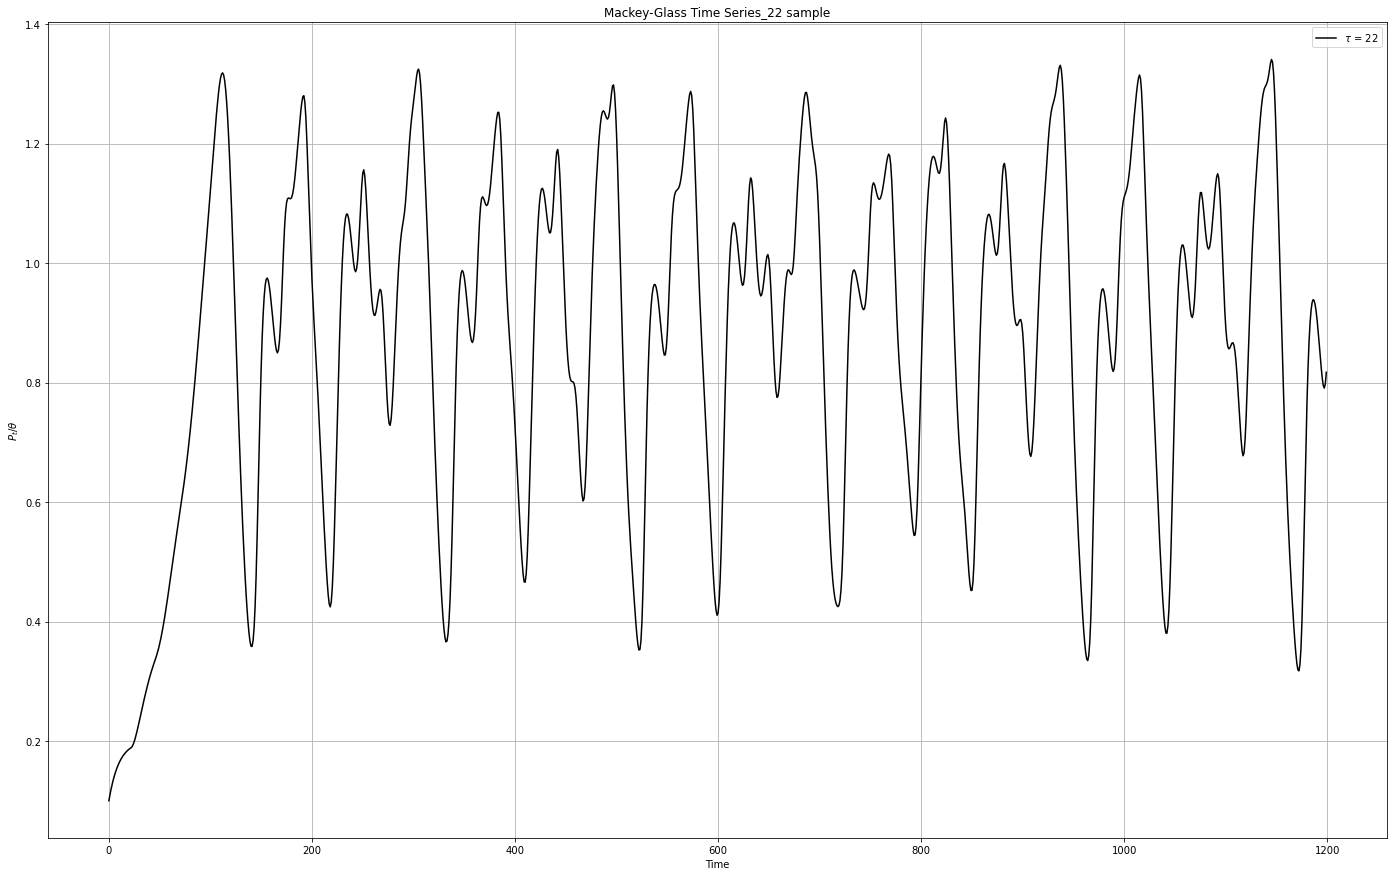

In [11]:
N = len(Q)

tit = 'Mackey-Glass Time Series_{}'.format(t)
lbl = r'$\tau$ = {}'.format(t)
x_lbl = 'Time'
y_lbl = r'$P_t$/$\theta$'
# filename = path + tit + filetype
plt.figure(figsize=(24,15))
plt.plot(Q, label = lbl, color='black')
plt.title(tit)
plt.legend()
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.grid()
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

tit = 'Mackey-Glass Time Series_{} sample'.format(t)
lbl = r'$\tau$ = {}'.format(t)
# filename = path + tit + filetype
plt.figure(figsize=(24,15))
plt.plot(Q[:1200], label = lbl, color='black')
plt.title(tit)
plt.legend()
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.grid()
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

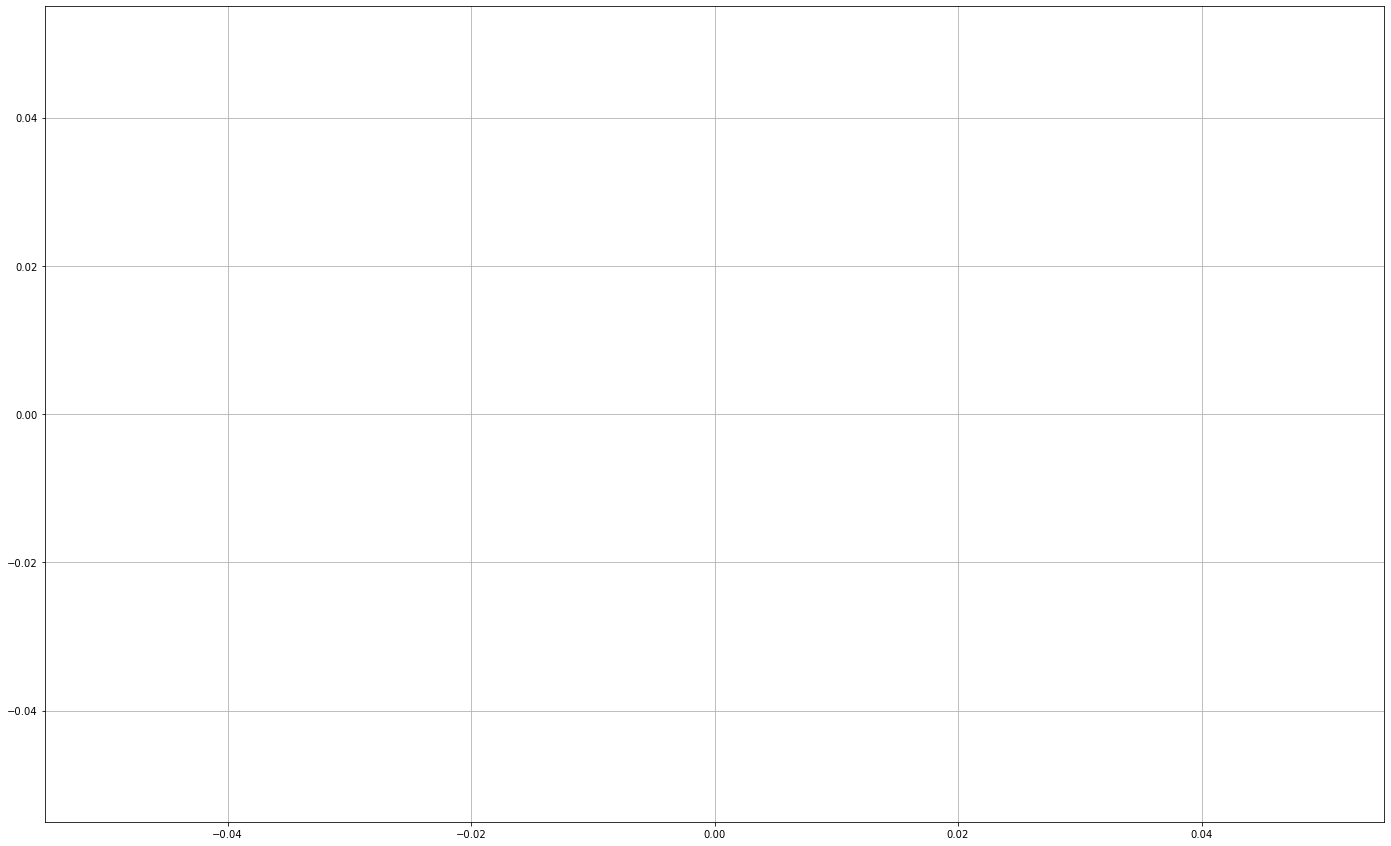

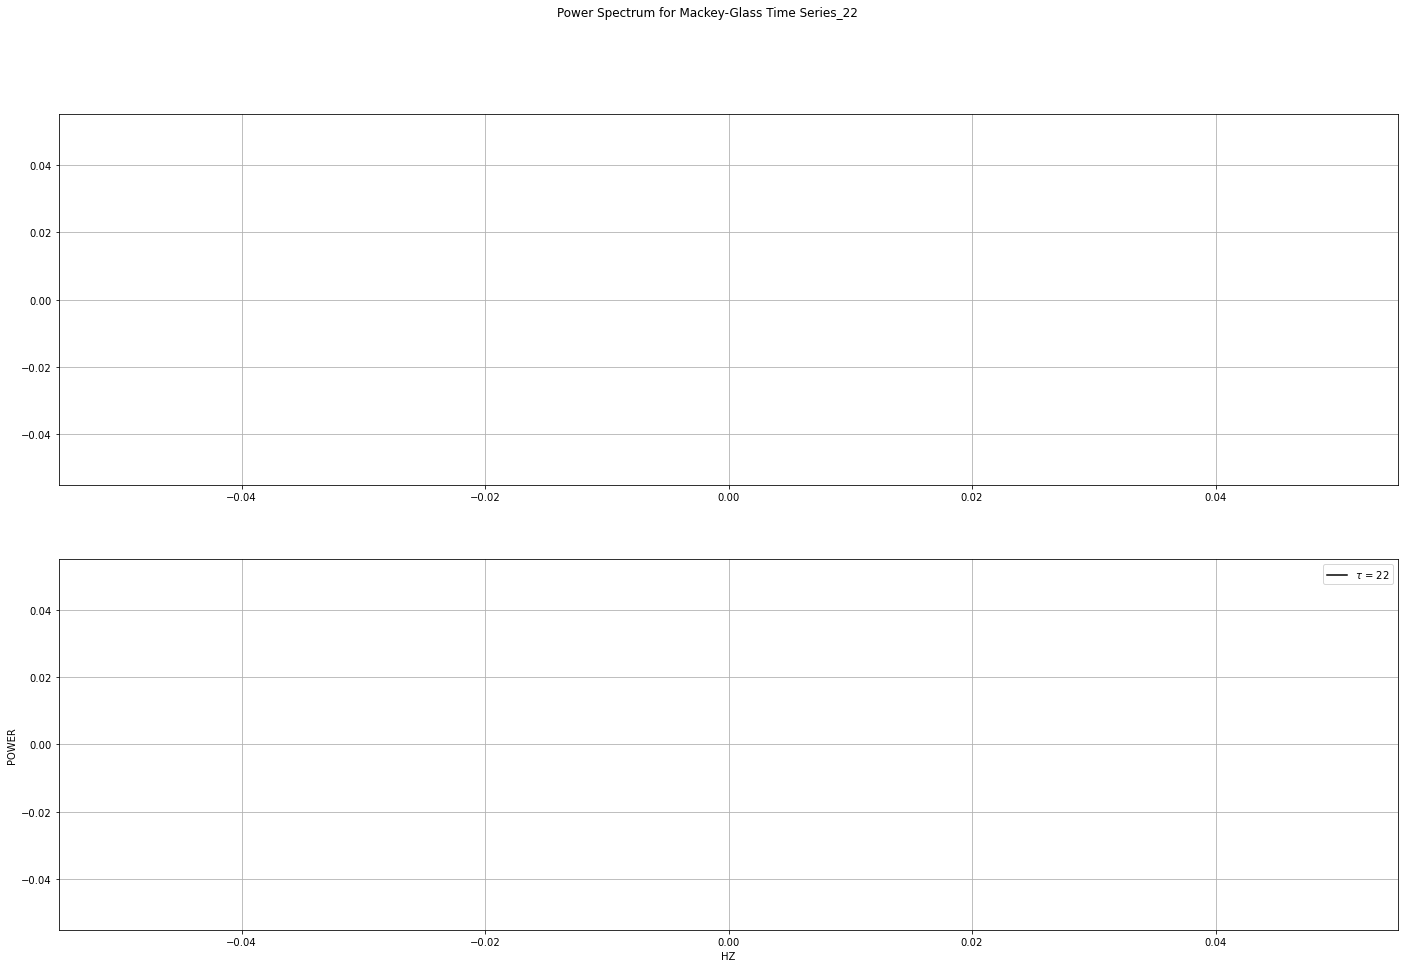

In [16]:
Fourier = np.fft.fft(Q)
Fourier = 2/N*np.abs(Fourier)
Ps = np.abs(Fourier*Fourier.conj())
time_step = 1 # Could be not one. Depends on the definition of the time step and the units. Economic Time series usually define the time step as one day.
freqs = np.fft.fftfreq(N, time_step)
idx = np.argsort(freqs) # Gives indexes for sorted data
idx = idx[N//2:]
idx_1 = idx[1:500]
# idx_2 = idx[500:]
# idx_3 = idx[200:]
# idx_4 = idx[300:]
# idx_5 = idx[1000:]

tit = 'Power Spectrum for Mackey-Glass Time Series_{}'.format(t)
x_lbl = 'HZ'
y_lbl = 'POWER'
plt.figure(figsize=(24,15))
plt.plot(freqs[idx], Ps[idx], label=lbl)
plt.grid()
fig, ax = plt.subplots(2, 1, figsize=(24,15))
plt.suptitle(tit)
ax[0].plot(freqs[idx], Ps[idx], label=lbl, color='black')
ax[0].grid()
ax[1].plot(freqs[idx_1], Ps[idx_1], label=lbl, color='black')
ax[1].grid()
# ax[2].plot(freqs[idx_2], Ps[idx_2], label=lbl)
# ax[2].grid()
# ax[3].plot(freqs[idx_3], Ps[idx_3], label=lbl)
# ax[3].grid()
# ax[4].plot(freqs[idx_4], Ps[idx_4], label=lbl)
# ax[4].grid()
# ax[5].plot(freqs[idx_5], Ps[idx_5], label=lbl)
# ax[5].grid()
plt.legend()
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
# filename = path + tit + filetype
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

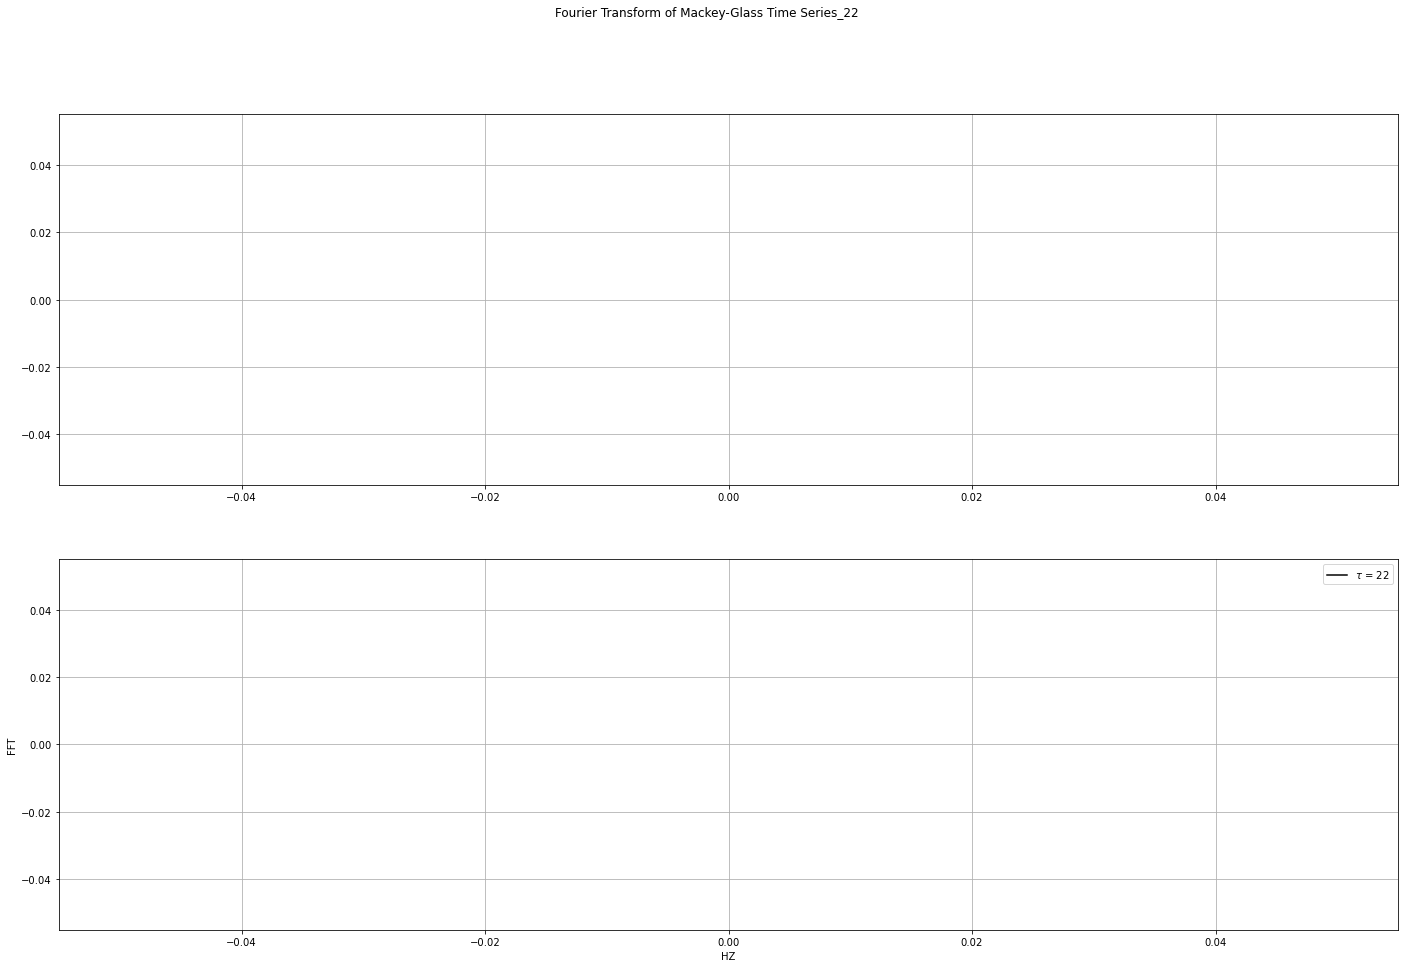

In [20]:
tit = 'Fourier Transform of Mackey-Glass Time Series_{}'.format(t)
y_lbl = 'FFT'
# filename = path + tit + filetype
# plt.figure(figsize=(24,15))
# plt.plot(freqs[idx], Fourier[idx], label=lbl)
# plt.grid()
fig, ax = plt.subplots(2, 1, figsize=(24,15))
plt.suptitle(tit)
ax[0].plot(freqs[idx], Fourier[idx], label=lbl, color='black')
ax[0].grid()
ax[1].plot(freqs[idx_1], Fourier[idx_1], label=lbl, color='black')
ax[1].grid()
# ax[2].plot(freqs[idx_2], Fourier[idx_2], label=lbl)
# ax[2].grid()
# ax[3].plot(freqs[idx_3], Fourier[idx_3], label=lbl)
# ax[3].grid()
# ax[4].plot(freqs[idx_4], Fourier[idx_4], label=lbl)
# ax[4].grid()
# ax[5].plot(freqs[idx_5], Fourier[idx_5], label=lbl)
# ax[5].grid()
plt.legend()
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

## PHASE SPACE

In [21]:
# Q = Q.T[0]
opt_t = 7 #taken from Matlab Results
Q_t = Q[opt_t:]
Q2 = Q[1:]
Q_2t = Q[2*opt_t:]
Q_t = np.pad(Q_t, (0,opt_t), 'constant', constant_values=Q_t[-1])
Q2 = np.pad(Q2, (0,1), 'constant', constant_values=Q2[-1])
Q_2t = np.pad(Q_2t, (0,2*opt_t), 'constant', constant_values=Q_2t[-1])
# Q_t = np.pad(Q_t, (0,t), 'constant', constant_values=Q_t[-1])


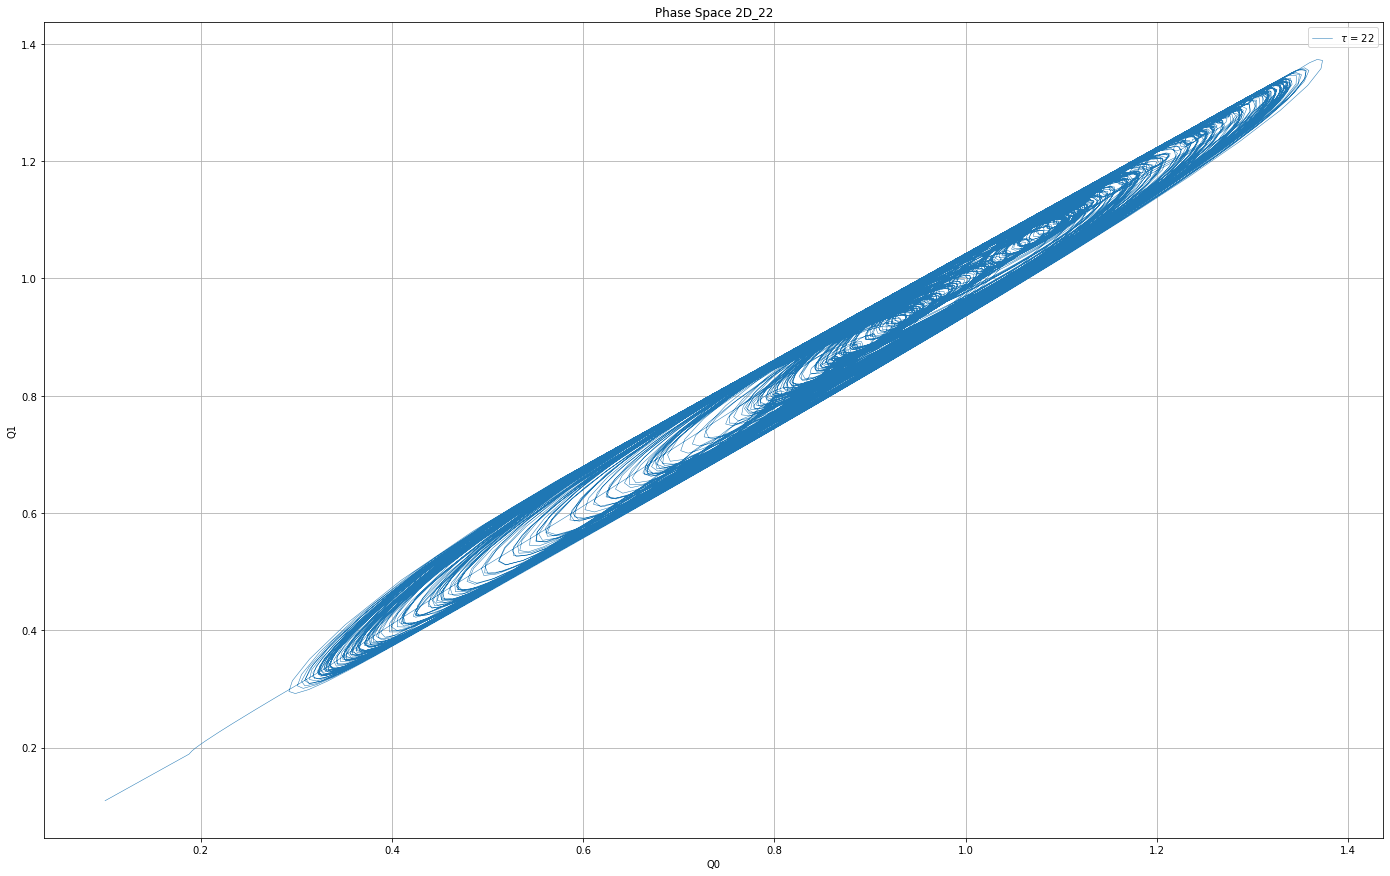

In [22]:
tit = 'Phase Space 2D_{}'.format(t)
# filename = path + tit + filetype
x_lbl = 'Q0'
y_lbl = 'Q1'
plt.figure(figsize=(24,15))
plt.plot(Q, Q2, label= lbl, linewidth= 0.5)
plt.title(tit)
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.legend()
plt.grid()
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

## ATTRACTOR

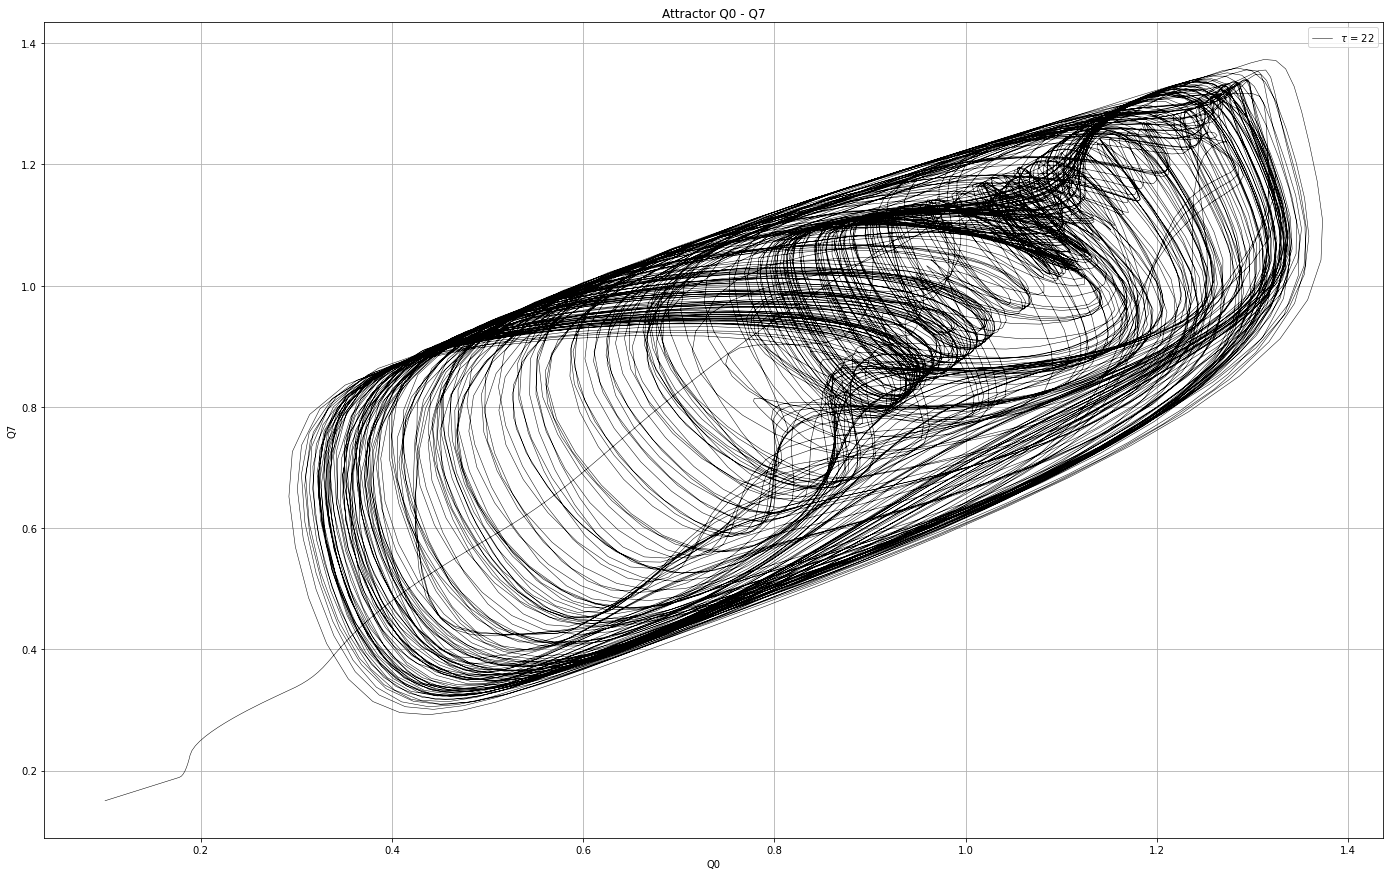

In [23]:
tit = 'Attractor Q0 - Q{}'.format(opt_t)
# filename = path + tit + filetype
x_lbl = 'Q0'
y_lbl = 'Q{}'.format(opt_t)
plt.figure(figsize=(24,15))
plt.plot(Q, Q_t, label = lbl, linewidth= 0.5, color='black')
plt.title(tit)
plt.xlabel(x_lbl)
plt.ylabel(y_lbl)
plt.legend()
plt.grid()
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

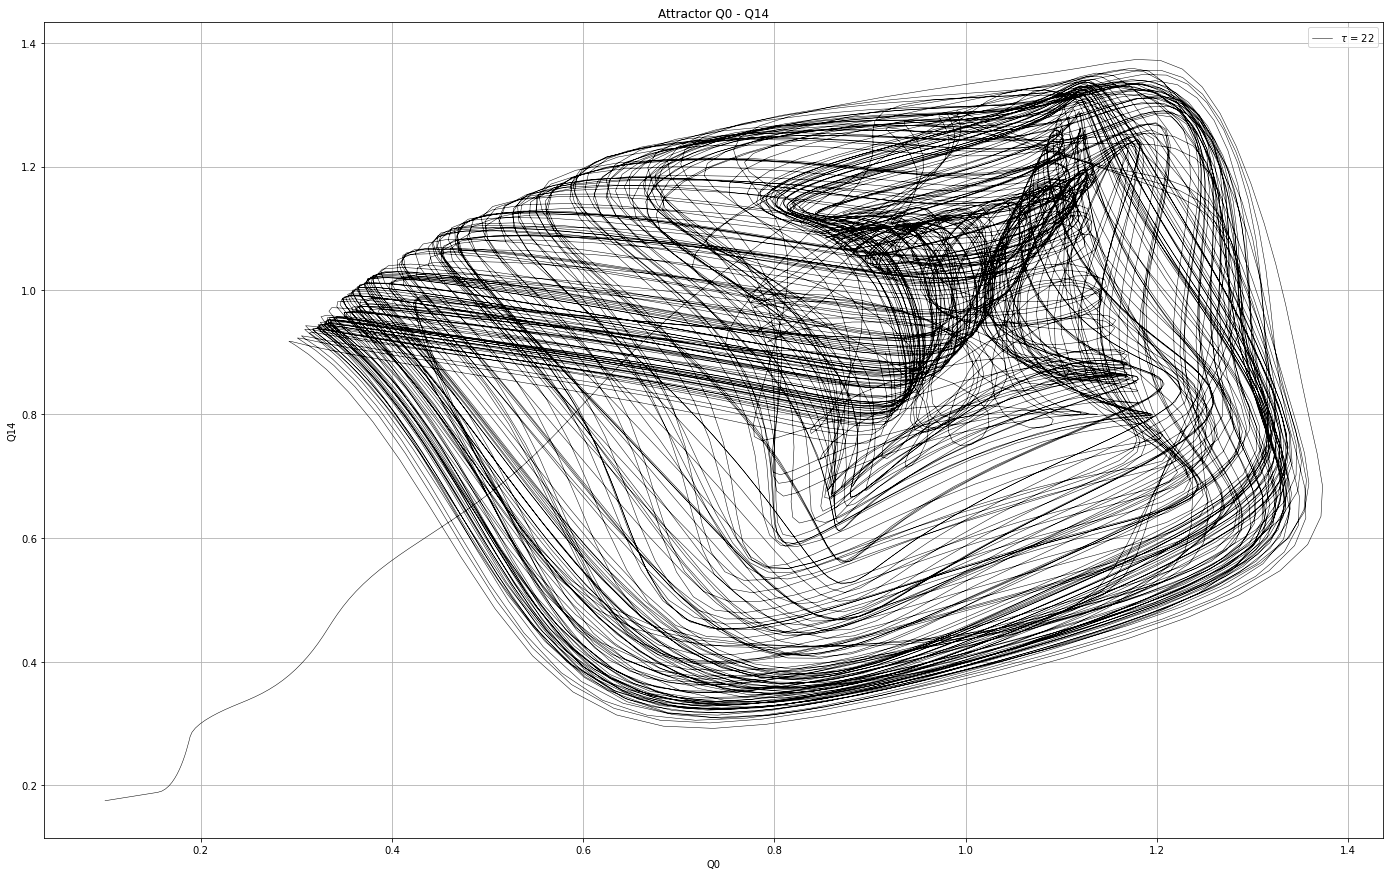

In [24]:
tit = 'Attractor Q0 - Q{}'.format(2*opt_t)
# filename = path + tit + filetype
x_lbl = 'Q0'
z_lbl = 'Q{}'.format(2*opt_t)
plt.figure(figsize=(24,15))
plt.plot(Q, Q_2t, label = lbl, linewidth= 0.5, color='black')
plt.title(tit)
plt.xlabel(x_lbl)
plt.ylabel(z_lbl)
plt.legend()
plt.grid()
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()

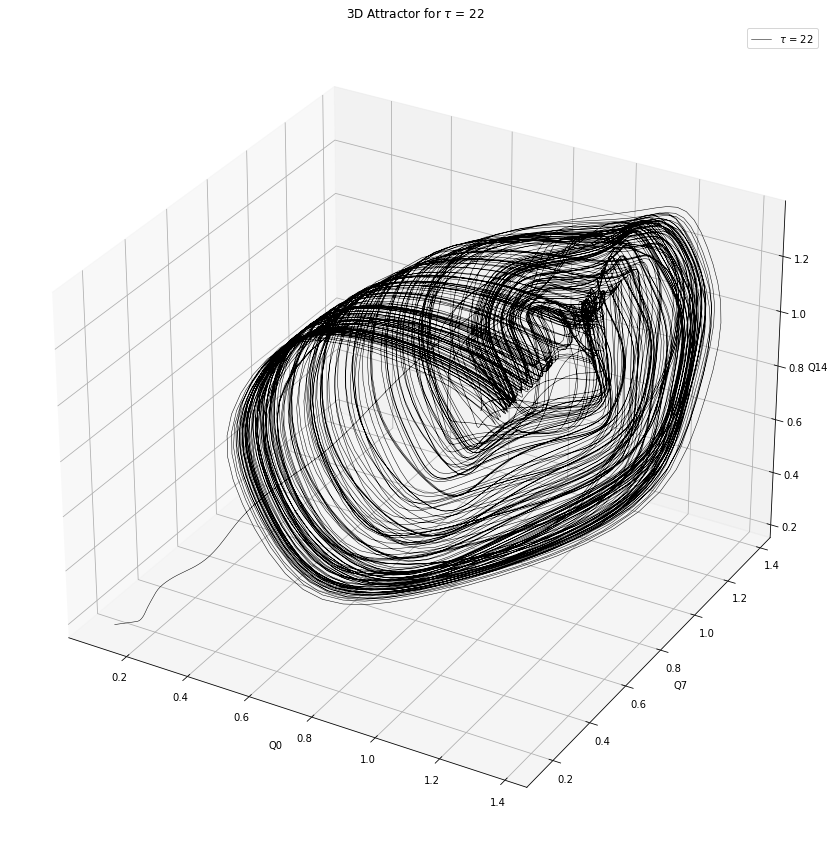

In [25]:
tit = '3D Attractor for ' + lbl
# filename = path + tit + filetype
fig = plt.figure(figsize=(24,15))
ax = plt.axes(projection='3d')
ax.plot3D(Q, Q_t, Q_2t, label = lbl, linewidth= 0.5, color='black')
plt.title(tit)
ax.set_xlabel(x_lbl)
ax.set_ylabel(y_lbl)
ax.set_zlabel(z_lbl)
plt.legend()
plt.grid()
# plt.savefig(filename, bbox_inches='tight')
plt.show()
# plt.clf()